<a href="https://colab.research.google.com/github/bakhshiali/Quantum-Machine-Learning/blob/main/Quantum_Circuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Circuits
We write a code to create
$$\frac{1}{{\sqrt{2}}} (|000\rangle - |101\rangle)$$

We use return value of circuit() function in order to evaluate expectation value of the first two qubits using PauliZ operator


In [ ]:
!pip install pennylane

In [ ]:
import pennylane as qml
from pennylane import numpy as np

In [ ]:
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def circuit():# try with IBM Composer/qiskit
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,2])
    qml.CZ(wires=[0,2])
    #qml.PauliZ(wires=0), qml.CNOT(wires=[0,2])
    return  qml.expval(qml.PauliZ(0)),qml.expval(qml.PauliZ(1))
# Evaluate the circuit
result = circuit()
print("Expectation value:", result)
                    # 1    2    3    4    5    6    7    8
print(dev.state[:]) #000, 001, 010, 011, 100, 101, 110, 111
print("|000>: ",dev.state[0]," , |101>: ",dev.state[5])

Expectation value: (tensor(0., requires_grad=True), tensor(1., requires_grad=True))
[ 0.70710678+0.j  0.        +0.j  0.        +0.j  0.        +0.j
  0.        +0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]
|000>:  (0.7071067811865475+0j)  , |101>:  (-0.7071067811865475+0j)


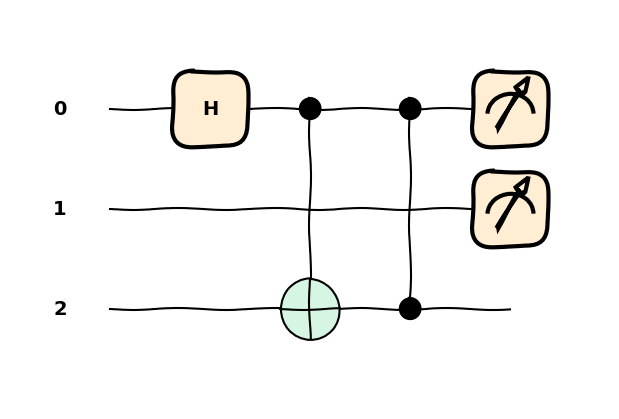

In [ ]:
import matplotlib.pyplot as plt
qml.drawer.use_style("sketch")#black_white")
fig, ax = qml.draw_mpl(circuit)()
plt.show()
#circuit.draw(format='latex')

# Parameterized Gates
In this phase, we apply single qubit (Z,Y) rotations to one qubit in order and evaluate the returned values of the defined quantum node

HINT:

1) Considering the order (Z,Y)             
2) Parameterizing the Gates using {params[i] for ith parameter}

We use the return value pf parameterized_circuit(params) in order to evaluate the tensor product of observables $Z\otimes Y \otimes X$

HINT:
1) Using this pattern { qml.expval(PauliZ(...) @ ...) }

In [ ]:
dev2 = qml.device("default.qubit", wires=1)

@qml.qnode(dev2)
def parameterized_circuit(params):
    #qml.Rot(params[0], params[1], params[2], wires=0)
    qml.RZ(params[0],wires=0)
    qml.RY(params[1],wires=0)  # ZY rotation
    return   qml.expval(qml.PauliZ(0)@qml.PauliY(0)@qml.PauliX(0))
# Define parameters
params = np.array([0.5, -0.3, 0.2])  # Example parameter values

# Evaluate the parameterized circuit
result = parameterized_circuit(params)
print("Expectation value:", result)

Expectation value: 0.9553364891256055


/usr/local/lib/python3.10/dist-packages/pennylane/operation.py:2039: UserWarning: Tensor object acts on overlapping wires; in some PennyLane functions this will lead to undefined behaviour
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pennylane/operation.py:2235: UserWarning: Tensor object acts on overlapping wires; in some PennyLane functions this will lead to undefined behaviour
  warnings.warn(


Cell below will initialize the parameters of the  parameterized_circuit and compute the the returned value of the function.
one can notice ,due to the random initialization, the mentioned value will be differernt during each cell run.

In [ ]:
params=np.random.rand(3)# random initialization, 3: 3 parameters derivable
parameterized_circuit(params)

tensor(0.69560571, requires_grad=True)